Author: Mario Roca

In [10]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## Explore npy structures (recursive)

In [11]:
def explore_structure(data, level=0):
    indent = "  " * level
    if isinstance(data, dict):
        print(f"{indent}Dict with keys: {list(data.keys())}")
        for key, value in data.items():
            print(f"{indent}Exploring key '{key}':")
            explore_structure(value, level + 1)
    elif isinstance(data, list):
        print(f"{indent}List of {len(data)} items")
        for i, item in enumerate(data[:3]):  # Limit to first 3 items for brevity
            print(f"{indent}Exploring list item {i}:")
            explore_structure(item, level + 1)
    elif isinstance(data, np.ndarray):
        print(f"{indent}Array with shape {data.shape} and dtype {data.dtype}")
        print(f"{indent}Content (first element): {data.ravel()[:4]}")  # Display first few elements
    else:
        print(f"{indent}{type(data)}: {data}")

In [12]:
# Load the EEG signals file
eeg_signals = np.load("eeg_signals.npy", allow_pickle=True).item()

# explore_structure(eeg_signals)

In [13]:
# The data structure is a nested dictionary with the following hierarchy:
# 
# 1. The outermost dictionary has keys representing patient IDs or identifiers (e.g., '2113_1', '2111_1').
# 2. Each patient ID maps to a dictionary containing different statuses or conditions (e.g., '10', '20', '14').
# 3. Each status key maps to a NumPy array.
# 4. These NumPy arrays have shapes indicating the number of samples and channels (e.g., (11917, 4) means 11917 samples and 4 channels).
# 5. The arrays contain EEG signal data with dtype float64.
# 
# Example structure:
# {
#     '2113_1': {},
#     '2111_1': {
#         '10': array with shape (11917, 4),
#         '20': array with shape (138142, 4)
#     },
#     '2108_1': {
#         '10': array with shape (27510, 4),
#         '20': array with shape (5289, 4),
#         '14': array with shape (129387, 4)
#     },
#     ...
# }
# 
# Usage:
# - The outermost dictionary allows access to data for each patient.
# - For each patient, the dictionary contains different statuses.
# - Each status key maps to a NumPy array of EEG signal data.
# - The arrays can be accessed and processed for feature extraction, analysis, or modeling.


In [14]:
# Load the ECG signals file
ecg_signals = np.load("ecg_signals.npy", allow_pickle=True).item()

# explore_structure(ecg_signals)

In [15]:
# The data structure is a nested dictionary with the following hierarchy:
# 
# 1. The outermost dictionary has keys representing patient IDs or identifiers (e.g., '2113_1', '2111_1').
# 2. Each patient ID maps to a dictionary containing different statuses or conditions (e.g., '10', '20', '14').
# 3. Each status key maps to a NumPy array.
# 4. These NumPy arrays have shapes indicating the number of samples and channels (e.g., (13482, 1) means 13482 samples and 1 channel).
# 5. The arrays contain ECG signal data with dtype uint16.
# 
# Example structure:
# {
#     '2113_1': {},
#     '2111_1': {
#         '10': array with shape (13482, 1),
#         '20': array with shape (156807, 1)
#     },
#     '2108_1': {
#         '10': array with shape (31248, 1),
#         '20': array with shape (5985, 1),
#         '14': array with shape (147042, 1)
#     },
#     ...
# }
# 
# Usage:
# - The outermost dictionary allows access to data for each patient.
# - For each patient, the dictionary contains different statuses.
# - Each status key maps to a NumPy array of ECG signal data.
# - The arrays can be accessed and processed for feature extraction, analysis, or modeling.


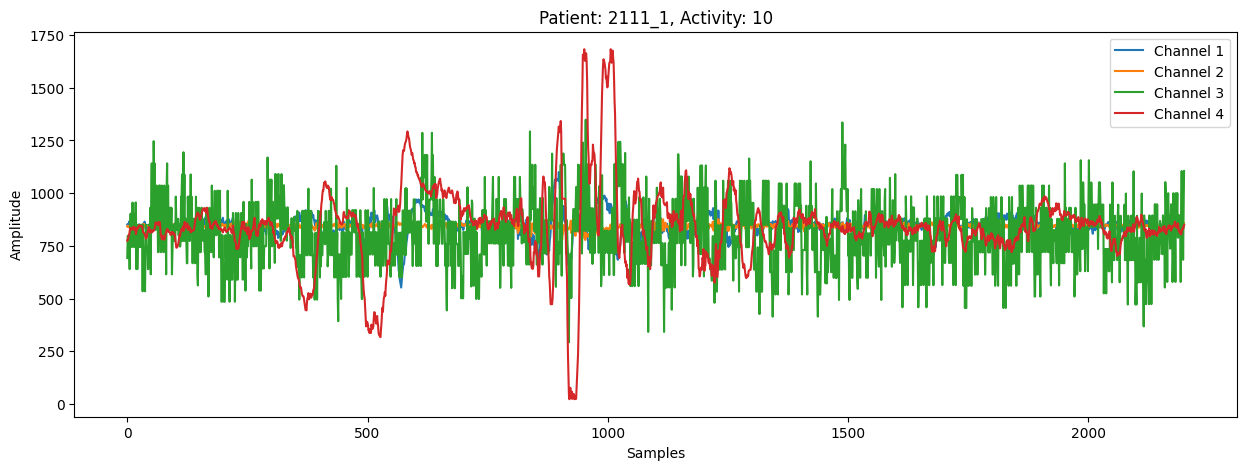

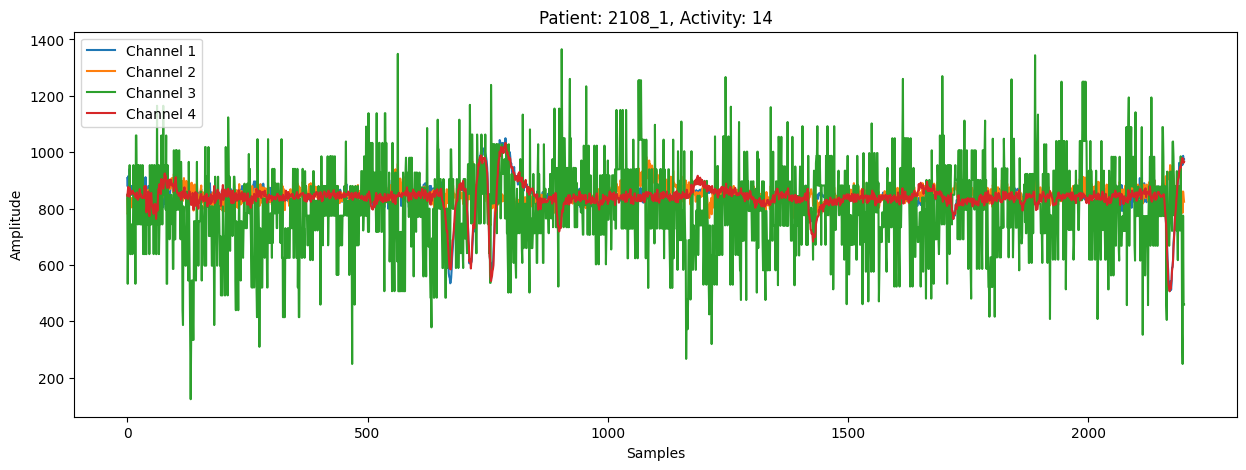

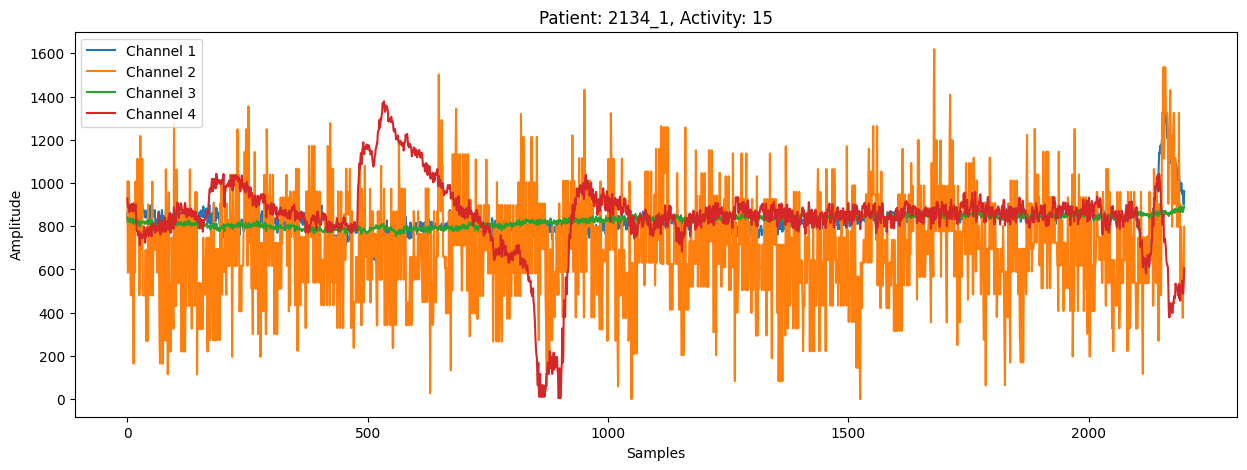

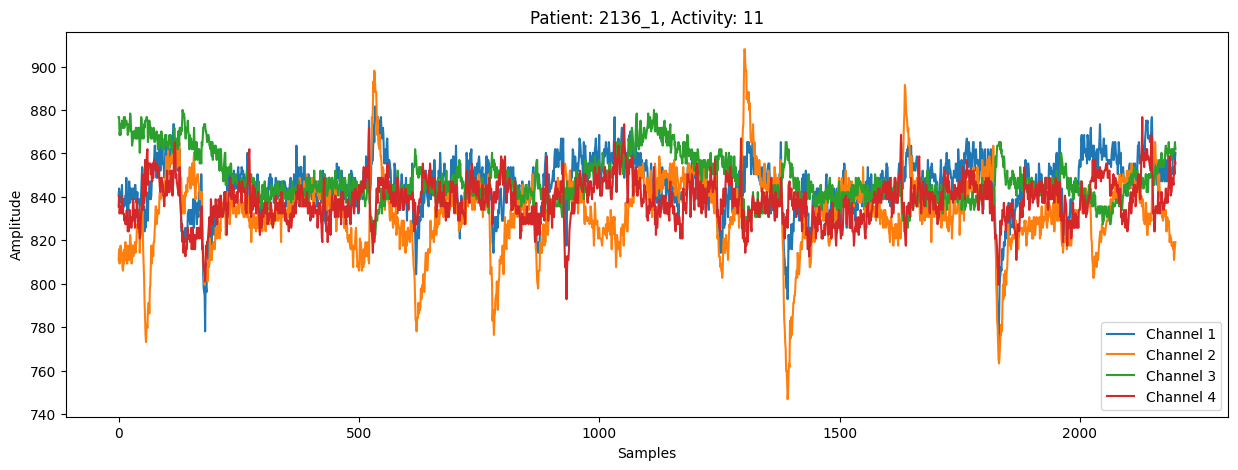

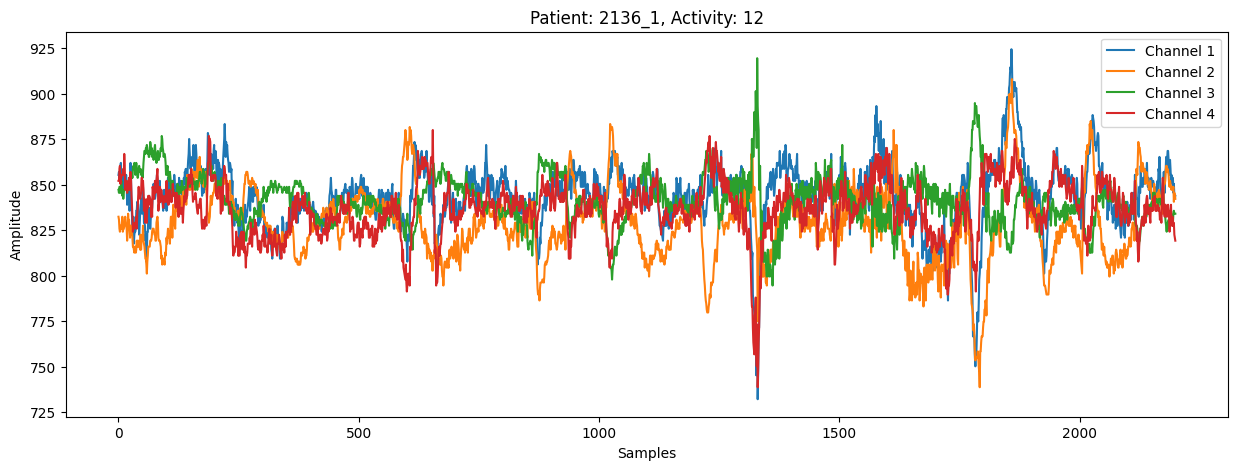

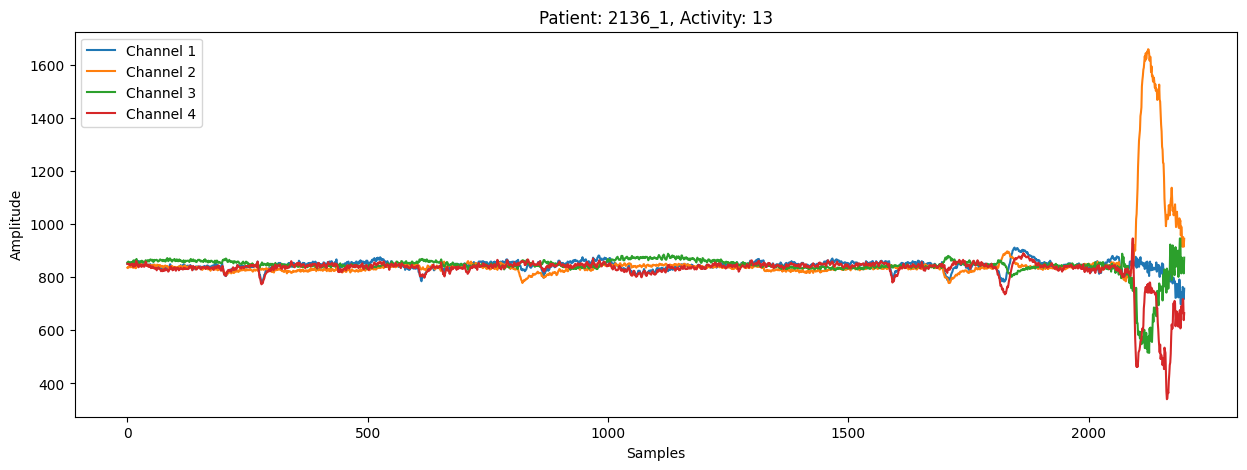

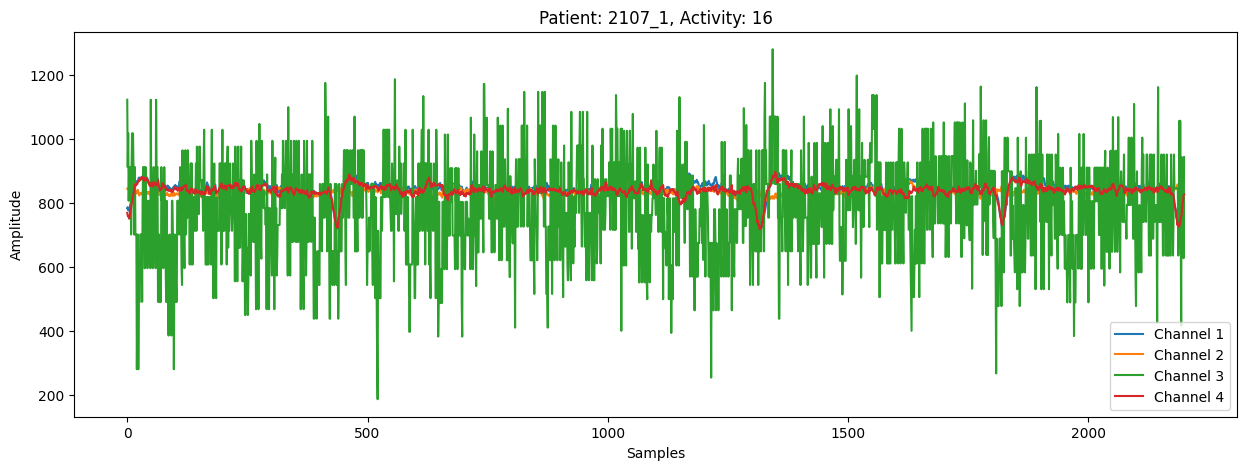

In [16]:
# Define the sampling rate (assuming 250 Hz)
sampling_rate = 220
time_window = 10  # seconds
samples_to_plot = sampling_rate * time_window

# Plot 10 seconds of the signal for each activity
activities_to_plot = ['10', '11', '12', '13', '14', '15', '16']
for patient_id, activities in eeg_signals.items():
    for activity, signal in activities.items():
        if activity in activities_to_plot:
            plt.figure(figsize=(15, 5))
            for channel in range(signal.shape[1]):
                plt.plot(signal[:samples_to_plot, channel], label=f'Channel {channel+1}')
            plt.title(f'Patient: {patient_id}, Activity: {activity}')
            plt.xlabel('Samples')
            plt.ylabel('Amplitude')
            plt.legend()
            plt.show()
            activities_to_plot.remove(activity)

In [17]:
# Initialize a dictionary to store the activities for each participant
participant_activities_summary = {}

# Iterate through the eeg_signals dictionary
for participant_id, activities in eeg_signals.items():
    # Check if the participant has any activities
    if activities:
        # Get the list of activities for the current participant
        activity_list = list(activities.keys())
        # Store the list in the dictionary
        participant_activities_summary[participant_id] = activity_list

# Remove participants with no data
participant_activities_summary = {k: v for k, v in participant_activities_summary.items() if v}

# Convert the dictionary to a DataFrame for better visualization
df_summary = pd.DataFrame.from_dict(participant_activities_summary, orient='index').transpose()

# Print the summary DataFrame
print(df_summary)

   2111_1 2108_1 2131_1 2117_1 2109_1 2134_1 2136_1 2116_1 2130_1 2114_1  \
0      10     10     10     10     10     10     10     10     10     10   
1      20     20   None     20     20     20     20     20     20     20   
2    None     14   None   None   None     15     11     12   None     13   
3    None   None   None   None   None   None     21   None   None   None   
4    None   None   None   None   None   None   10_1   None   None   None   
5    None   None   None   None   None   None   20_2   None   None   None   
6    None   None   None   None   None   None     12   None   None   None   
7    None   None   None   None   None   None     22   None   None   None   
8    None   None   None   None   None   None   10_3   None   None   None   
9    None   None   None   None   None   None   20_4   None   None   None   
10   None   None   None   None   None   None     13   None   None   None   

   2129_1 2107_1 2105_1 2121_1 2126_1 2124_1 2120_1 2104_2 2122_1 2106_1  
0      10   